<a href="https://colab.research.google.com/github/linaelsadek/ClassificationOverEncryptedImages/blob/main/Classification_of_Dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [90]:
#Load libraries
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets, transforms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
#mount google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
#import data
train_data_path = ''
validate_data_path = ''
test_data_path = ''

In [78]:
# transformations to be applied on images
#normalize pixel values
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# defining the training and testing set
trainset = datasets.ImageFolder(train_data_path, transform=transform)
#Note: for now, validation set is 2% of the training set, but have not deleted the images from
#training, so there is 20-22 image overlap until we're sure we want to go with this way
validateset = datasets.ImageFolder(validate_data_path, transform=transform) 
testset = datasets.ImageFolder(test_data_path, transform=transform)

#print(trainset)
#print(testset)

Dataset ImageFolder
    Number of datapoints: 10541
    Root location: /content/drive/MyDrive/CAS 771 - Big Data/Dataset 1/train/
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Dataset ImageFolder
    Number of datapoints: 2211
    Root location: /content/drive/MyDrive/CAS 771 - Big Data/Dataset 1/test/
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [83]:
# defining datasets into iterable batches of defined sizes
# we decided to have the entire set be defined in 1 batch since breaking the dataset into
# smaller batches required us to use many loops throughout the process that ultimately impacted performance 
trainSize = len(trainset)
validateSize = len(validateset)
testSize = len(testset)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=trainsize, shuffle=True)
validateloader = torch.utils.data.DataLoader(validateset, batch_size=validateSize, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=testSize, shuffle=True)

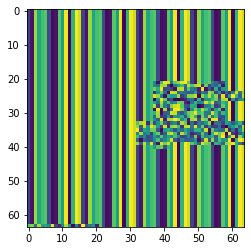

In [88]:
# visualizing the training images
plt.imshow(images[0][0].numpy().squeeze())

In [86]:
#duplicate of below for testing
for k in [1, 3, 5, 9, 15, 25, ]:
  model = KNeighborsClassifier(n_neighbors=k)
  
  #Training Set
  dataiter = iter(trainloader)
  images, labels = dataiter.next()
  images2 = images.reshape(images.shape[0],-1)
  model.fit(images2, labels) 

  #Validation Set
  valiter = iter(validateloader)
  valimages, vallabels = valiter.next()
  valimages2 = valimages.reshape(valimages.shape[0],-1)
  model.fit(valimages2, vallabels) 

  score = model.score(valimages2, vallabels)
  print(k, score) 

1 1.0
3 0.7355769230769231
5 0.6730769230769231
9 0.5721153846153846
15 0.4807692307692308
25 0.4855769230769231


In [87]:
#reload the training dataset into the model and compare it with the test dataset
model = KNeighborsClassifier(n_neighbors=1)
model.fit(images2, labels)

testiter = iter(testloader)
testimages, testlabels = testiter.next()
testimages2 = testimages.reshape(testimages.shape[0],-1)

model.fit(testimages2, testlabels) 
accuracy = model.score(testimages2, testlabels)

print("Achieved accuracy of %.2f%% on test data" % (accuracy*100))

Achieved accuracy of 100.00% on test data


In [92]:
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
predictions = model.predict(testimages2)
print("Classification Report")
print(classification_report(testlabels, predictions))

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       215
           3       1.00      1.00      1.00       207
           4       1.00      1.00      1.00       238
           5       1.00      1.00      1.00       200
           6       1.00      1.00      1.00       238
           7       1.00      1.00      1.00       213
           8       1.00      1.00      1.00       213
           9       1.00      1.00      1.00       236
          10       1.00      1.00      1.00       223

    accuracy                           1.00      2211
   macro avg       1.00      1.00      1.00      2211
weighted avg       1.00      1.00      1.00      2211

